In [14]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

In [2]:
import sys
sys.stdout = open('/dev/stdout', 'w')

In [11]:
good=[]
with open('twitter_data/twex.tsv','r') as f:
    aa=next(f)
    for line in f:
        splitLine = line.strip().split('\t')
        if(len(splitLine)==20):
            good.append(splitLine)


In [12]:
len(good)

16092808

In [13]:
df = pd.DataFrame(good, columns=None)

In [15]:
schema=['id','userId','createdAt','text','longitude','latitude','placeId','inReplyTo','source','truncated','placeLatitude',
        'placeLongitude','sourceName','sourceUrl','userName','screenName','followersCount','friendsCount',
        'statusesCount','userLocation']
df.columns=schema

In [16]:
df.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,placeLatitude,placeLongitude,sourceName,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation
0,9514846412,7198282,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550, ,\N,\N,Gowalla,http://gowalla.com/,Nico Luchsinger,halbluchs,1820,703,4687,"Zurich, Switzerland"
1,9516574359,14657884,2010-02-23 07:34:25,It has been a week or so.. and today I just co...,6.13396,46.1951,\N,\N,3, ,\N,\N,foursquare,http://foursquare.com,Javier Belmonte,vichango,167,277,2885,"Geneva, Switzerland"
2,9516952605,14703863,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62, ,\N,\N,Twittelator,http://stone.com/Twittelator,Urs,ugro,75,161,1390,"Zürich, Switzerland"
3,9517198943,14393717,2010-02-23 08:02:57,Un peu de réconfort liquide en take away après...,6.63254,46.5199,\N,\N,3, ,\N,\N,foursquare,http://foursquare.com,Romain P.,PIMboula,135,109,2381,"Lausanne, Suisse"
4,9517916537,13535402,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.5301,47.3152,\N,\N,550, ,\N,\N,Gowalla,http://gowalla.com/,Patrick Hediger,hediger,1511,682,12157,"Zurich, Switzerland"


In [17]:
df.to_csv('good_20_col.csv', index=None)

In [18]:
len(df)

16092808

In [19]:
del df

In [20]:
import gc
gc.collect()

35

In [51]:
no_location=[]
with open('twitter_data/twex.tsv','r') as f:
    aa=next(f)
    for line in f:
        splitLine = line.strip().split('\t')
        if(len(splitLine)==19):
            no_location.append(splitLine)


In [52]:
len(no_location)

3075681

In [53]:
df = pd.DataFrame(no_location, columns=None)

In [54]:
schema=['id','userId','createdAt','text','longitude','latitude','placeId','inReplyTo','source','truncated','placeLatitude',
        'placeLongitude','sourceName','sourceUrl','userName','screenName','followersCount','friendsCount',
        'statusesCount']
df.columns=schema

In [55]:
df['userLocation']=None

In [1]:
df.head(5)

NameError: name 'df' is not defined

In [11]:
df.to_csv('no_location_19_fixed.csv', index=None)

In [3]:
bad=[]
with open('twitter_data/twex.tsv','r') as f:
    for line in f:
        splitLine = line.strip().split('\t')
        if(len(splitLine)!=20):
            if(len(splitLine)!=19):
                bad.append(splitLine)

In [4]:
len(bad)

3053694

In [16]:
i=-1
for a in bad:
    i+=1
    if((len(a)==1) & (a[0]=='')):
        del bad[i]

In [17]:
len(bad)

3050419

In [22]:
i=-1
for a in bad:
    i+=1
    if((len(a)==1) &(a[0][-1:]!='\\')):
        del bad[i]

In [23]:
len(bad)

3050397

In [24]:
fix_bad=[]
temp=[]
idx = -1
d=0
c=0
for i in range(len(bad)):
    temp=[]
    idx = idx + 1
    if(idx>=len(bad)):
        break
    thiselem = bad[idx]
    temp.append(thiselem)
    #print(thiselem)
    if(thiselem[-1][-1:]=='\\'):
        for s in range(125):
            idx = idx + 1
            #if(idx>len(bad)):
            #    break
            nextelem = bad[idx]
            if(nextelem[-1][-1:]=='\\'):
                temp.append(nextelem)
            else:
                temp.append(nextelem)
                break
    flattened = [val for sublist in temp for val in sublist]
    
    fix_bad.append(flattened)
    d+=1
    if(d==1000):
        c+=1000
        print(c)
        d=0
    
    if(len(flattened)<19):
        print(len(flattened))
        print(idx)
        print(flattened)
        break


In [25]:
len(fix_bad)

1045185

In [26]:
clean_all=[]
for xx in fix_bad:
    clean=[]
    tweet=xx
    clean.append(tweet[0])
    clean.append(tweet[1])
    clean.append(tweet[2])
    text=tweet[3]
    i=4
    if(text[-1:]=='\\'):
        for s in range(125):
            temp=tweet[i]
            #print(i)
            
            if(temp[-1:]=='\\'):
                text+=' '+temp
            else:
                text+=' '+temp
                break
            i+=1
    i+=1
    clean.append(text.replace('\\',''))
    for ff in range((len(tweet))-(i)):
        clean.append(tweet[i])
        i+=1
    clean_all.append(clean)

In [27]:
len(clean_all)

1045185

In [28]:
aa=[]
i=-1
for a in clean_all:
    i+=1
    if((len(a)==20)):
        #aa.append(i)
        aa.append(a)

In [30]:
df_20=pd.DataFrame(aa, columns=None)

In [31]:
schema=['id','userId','createdAt','text','longitude','latitude','placeId','inReplyTo','source','truncated','placeLatitude',
        'placeLongitude','sourceName','sourceUrl','userName','screenName','followersCount','friendsCount',
        'statusesCount','userLocation']
df_20.columns=schema

In [2]:
df_20.head()

NameError: name 'df_20' is not defined

In [38]:
df_20.to_csv('20_col_small', index=None)

In [ ]:
# combile dataframes

In [3]:
df_20_long=pd.read_csv('good_20_col.csv')

/Users/Ray/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_20_small=pd.read_csv('20_col_small')

/Users/Ray/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_no_location=pd.read_csv('no_location_19_fixed.csv')

In [8]:
df_20_long=pd.concat([df_20_long,df_20_small])

In [9]:
len(df_20_long)

22871526

In [10]:
df_20_long.to_csv('cleaned_tweets.csv',index=None)

In [11]:
bad=df_20_long[~df_20_long['id'].apply(lambda x: str(x).isdigit())]
len(bad)

17253636

In [69]:
del bad

In [70]:
import gc
gc.collect()

711

In [65]:
bad.id[0]

9514846412.0

In [13]:
bad.head()

,Unnamed: 0,createdAt,followersCount,friendsCount,id,inReplyTo,latitude,longitude,placeId,placeLatitude,...,screenName,source,sourceName,sourceUrl,statusesCount,text,truncated,userId,userLocation,userName
0,0,2010-02-23 06:22:40,1820,703.0,9.51485e+09,\N,47.3678,8.53781,\N,\N,...,halbluchs,550,Gowalla,http://gowalla.com/,4687,Still the best coffee in town — at La Stanza h...,NaN,7.19828e+06,"Zurich, Switzerland",Nico Luchsinger
1,1,2010-02-23 07:34:25,167,277.0,9.51657e+09,\N,46.1951,6.13396,\N,\N,...,vichango,3,foursquare,http://foursquare.com,2885,It has been a week or so.. and today I just co...,NaN,1.46579e+07,"Geneva, Switzerland",Javier Belmonte
2,2,2010-02-23 07:51:47,75,161.0,9.51695e+09,\N,47.2288,8.81749,\N,\N,...,ugro,62,Twittelator,http://stone.com/Twittelator,1390,Getting ready.. http://twitpic.com/14v8gz,NaN,1.47039e+07,"Zürich, Switzerland",Urs
3,3,2010-02-23 08:02:57,135,109.0,9.5172e+09,\N,46.5199,6.63254,\N,\N,...,PIMboula,3,foursquare,http://foursquare.com,2381,Un peu de réconfort liquide en take away après...,NaN,1.43937e+07,"Lausanne, Suisse",Romain P.
4,4,2010-02-23 08:35:39,1511,682.0,9.51792e+09,\N,47.3152,8.5301,\N,\N,...,hediger,550,Gowalla,http://gowalla.com/,12157,I'm at Online PC Magazin in Adliswil http://go...,NaN,1.35354e+07,"Zurich, Switzerland",Patrick Hediger


# Use Pandas read csv

In [1]:
import pandas as pd
import csv

In [ ]:
aa=pd.read_csv('twitter_data/twex.tsv',)

In [3]:
aa=pd.read_csv('twitter_data/twex.tsv', sep="\t",encoding='utf-8', quoting=csv.QUOTE_NONE, error_bad_lines=False)

b'Skipping line 15165: expected 20 fields, saw 21\nSkipping line 29505: expected 20 fields, saw 21\n'
b'Skipping line 71439: expected 20 fields, saw 21\n'
b'Skipping line 124917: expected 20 fields, saw 21\n'
b'Skipping line 160558: expected 20 fields, saw 21\n'
b'Skipping line 167375: expected 20 fields, saw 21\n'
b'Skipping line 288867: expected 20 fields, saw 21\n'
b'Skipping line 395221: expected 20 fields, saw 21\n'
b'Skipping line 441820: expected 20 fields, saw 21\nSkipping line 451058: expected 20 fields, saw 21\n'
b'Skipping line 521577: expected 20 fields, saw 21\n'
b'Skipping line 527172: expected 20 fields, saw 21\nSkipping line 534185: expected 20 fields, saw 21\n'
b'Skipping line 561172: expected 20 fields, saw 21\nSkipping line 561182: expected 20 fields, saw 21\nSkipping line 561288: expected 20 fields, saw 21\nSkipping line 561296: expected 20 fields, saw 21\nSkipping line 561360: expected 20 fields, saw 21\nSkipping line 562167: expected 20 fields, saw 21\nSkipping li

In [4]:
len(aa)

30736791

In [9]:
schema=['id','userId','createdAt','text','longitude','latitude','placeId','inReplyTo','source','truncated','placeLatitude',
        'placeLongitude','sourceName','sourceUrl','userName','screenName','followersCount','friendsCount',
        'statusesCount','userLocation']
aa.columns=schema

In [10]:
aa.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,placeLatitude,placeLongitude,sourceName,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation
0,9514846412,7198282,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550,NaN,\N,\N,Gowalla,http://gowalla.com/,Nico Luchsinger,halbluchs,1820,703,4687.0,"Zurich, Switzerland"
1,9516574359,14657884,2010-02-23 07:34:25,It has been a week or so.. and today I just co...,6.13396,46.1951,\N,\N,3,NaN,\N,\N,foursquare,http://foursquare.com,Javier Belmonte,vichango,167,277,2885.0,"Geneva, Switzerland"
2,9516952605,14703863,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62,NaN,\N,\N,Twittelator,http://stone.com/Twittelator,Urs,ugro,75,161,1390.0,"Zürich, Switzerland"
3,9517198943,14393717,2010-02-23 08:02:57,Un peu de réconfort liquide en take away après...,6.63254,46.5199,\N,\N,3,NaN,\N,\N,foursquare,http://foursquare.com,Romain P.,PIMboula,135,109,2381.0,"Lausanne, Suisse"
4,9517916537,13535402,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.5301,47.3152,\N,\N,550,NaN,\N,\N,Gowalla,http://gowalla.com/,Patrick Hediger,hediger,1511,682,12157.0,"Zurich, Switzerland"


In [11]:
bad=aa[~aa['id'].apply(lambda x: str(x).isdigit())]

In [12]:
len(bad)

5111995

In [17]:
aa=aa[aa['id'].apply(lambda x: str(x).isdigit())]

In [18]:
len(aa)

25624796

In [7]:
#aa=aa[aa['createdAt'].notnull()]

In [19]:
aa=aa[aa['text'].notnull()]

In [20]:
len(aa)

25439230

In [21]:
aa=aa[((~aa['longitude'].isnull()) & (~aa['latitude'].isnull()) 
      |
    ((~aa['placeLongitude'].isnull()) & (~aa['placeLatitude'].isnull())))
    ]



In [22]:
len(aa)

18986786

In [23]:
aa.to_csv("cleaned_tweets.csv", index=None)

In [ ]:
aa['longitude']=aa.longitude.convert_objects(convert_numeric=True)
aa['latitude']=aa.latitude.convert_objects(convert_numeric=True)
aa['placeLatitude']=aa.placeLatitude.convert_objects(convert_numeric=True)
aa['placeLongitude']=aa.placeLongitude.convert_objects(convert_numeric=True)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [3]:
aa.head()

,id,userId,createdAt,text,longitude,latitude,placeId,inReplyTo,source,truncated,placeLatitude,placeLongitude,sourceName,sourceUrl,userName,screenName,followersCount,friendsCount,statusesCount,userLocation
0,9514846412,7198282,2010-02-23 06:22:40,Still the best coffee in town — at La Stanza h...,8.53781,47.3678,\N,\N,550,NaN,NaN,NaN,Gowalla,http://gowalla.com/,Nico Luchsinger,halbluchs,1820,703.0,4687.0,"Zurich, Switzerland"
1,9516574359,14657884,2010-02-23 07:34:25,It has been a week or so.. and today I just co...,6.13396,46.1951,\N,\N,3,NaN,NaN,NaN,foursquare,http://foursquare.com,Javier Belmonte,vichango,167,277.0,2885.0,"Geneva, Switzerland"
2,9516952605,14703863,2010-02-23 07:51:47,Getting ready.. http://twitpic.com/14v8gz,8.81749,47.2288,\N,\N,62,NaN,NaN,NaN,Twittelator,http://stone.com/Twittelator,Urs,ugro,75,161.0,1390.0,"Zürich, Switzerland"
3,9517198943,14393717,2010-02-23 08:02:57,Un peu de réconfort liquide en take away après...,6.63254,46.5199,\N,\N,3,NaN,NaN,NaN,foursquare,http://foursquare.com,Romain P.,PIMboula,135,109.0,2381.0,"Lausanne, Suisse"
4,9517916537,13535402,2010-02-23 08:35:39,I'm at Online PC Magazin in Adliswil http://go...,8.53010,47.3152,\N,\N,550,NaN,NaN,NaN,Gowalla,http://gowalla.com/,Patrick Hediger,hediger,1511,682.0,12157.0,"Zurich, Switzerland"


In [4]:
aa['swiss']='no'

In [17]:
len(t)

18986786

In [5]:
len(aa)

18986786

In [6]:
#
aa.ix[((aa.latitude>= 45.818) & 
         (aa.latitude<=47.8084) & 
         (aa.longitude>=5.9559) &
         (aa.longitude<=10.4921)) |
         ((aa.placeLatitude>= 45.818) & 
         (aa.placeLatitude<=47.8084) & 
         (aa.placeLongitude>=5.9559) &
         (aa.placeLongitude<=10.4921))
         , 'swiss'] = 'yes'

In [9]:
aa=aa[aa['swiss']=='yes']

In [11]:
aa.to_csv("swiss_tweets.csv", index=None)

In [2]:
aa=pd.read_csv('swiss_tweets.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
lausanne=aa[
        ((aa.latitude>= 46.48622) & 
         (aa.latitude<=46.576681) & 
         (aa.longitude>=6.534805) &
         (aa.longitude<=6.72123)) 
        |
         ((aa.placeLatitude>= 46.48622) & 
         (aa.placeLatitude<=46.576681) & 
         (aa.placeLongitude>=6.534805) &
         (aa.placeLongitude<=6.72123))
    ]
       

In [18]:
len(lausanne)

920156

In [21]:
lausanne.to_csv("lausanne_tweets.csv", index=None)

In [ ]:
lausanne.createdAt.max()

In [5]:
lausanne.createdAt.min()

'2002-04-19 14:50:32'

In [ ]:
lausanne.createdAt.mean()

# Assigning tweets to cantons

In [5]:
swiss=pd.read_csv("swiss_tweets.csv")

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:

#coordinates_df = df#[['longitude', 'latitude']][0:500000]
#coordinates_df.head()


import json
from shapely.geometry import shape, Point
# depending on your version, use: from shapely.geometry import shape, Point

# load GeoJSON file containing sectors
#with open('swiss.geojson.json') as f:
with open('canton_mapping_tests/swiss-simple.geojson.json' ) as f: #swiss.geojson.json
    js = json.load(f,encoding = "ISO-8859-1")

# construct point based on lon/lat returned by geocoder
#point = Point(-122.7924463, 45.4519896)

polygons_dict = {}

# check each polygon to see if it contains the point
for feature in js['features']:
    polygon = shape(feature['geometry'])
    polygons_dict[feature['id']] = polygon
    
id_to_label = dict(zip(range(len(polygons_dict.items())),polygons_dict.keys()))
id_to_poly = {num:polygons_dict[id_to_label[num]] for num in id_to_label.keys()}
id_to_poly

#coordinates_df = coordinates_df.dropna(axis=0)



{0: <shapely.geometry.polygon.Polygon at 0x19457a198>,
 1: <shapely.geometry.polygon.Polygon at 0x19457a588>,
 2: <shapely.geometry.polygon.Polygon at 0x19457a2b0>,
 3: <shapely.geometry.polygon.Polygon at 0x19457a4e0>,
 4: <shapely.geometry.polygon.Polygon at 0x19457a080>,
 5: <shapely.geometry.polygon.Polygon at 0x19457a0b8>,
 6: <shapely.geometry.polygon.Polygon at 0x19457a128>,
 7: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a390>,
 8: <shapely.geometry.polygon.Polygon at 0x19457a048>,
 9: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a2e8>,
 10: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a208>,
 11: <shapely.geometry.polygon.Polygon at 0x19457a4a8>,
 12: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a518>,
 13: <shapely.geometry.polygon.Polygon at 0x19457a438>,
 14: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a0f0>,
 15: <shapely.geometry.multipolygon.MultiPolygon at 0x19457a320>,
 16: <shapely.geometry.polygon.Polygon at 0x19457a358>

In [7]:
from rtree import index

idx = index.Index()
for pos, poly in id_to_poly.items():
    idx.insert(pos, poly.bounds)

In [8]:
def get_canton(row):
    lon=row['longitude']
    lat=row['latitude']
    if(str(lon)=='nan'):
        lon=row['placeLongitude']
        lat=row['placeLatitude']
    #point = Point(row['longitude'], row['latitude'])
    point = Point(lon, lat)
    # iterate through spatial index
    for j in idx.intersection(point.coords[0]):
        if point.within(id_to_poly[j]):
            return id_to_label[j]
            #print(id_to_label[j], point)
    return None

In [ ]:
%%time
swiss['canton'] = swiss.apply(get_canton, axis=1)
#2:21

Exception ignored in: <generator object Index._get_ids at 0x1acd64620>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/rtree/index.py", line 502, in _get_ids
    core.rt.Index_Free(its)
KeyboardInterrupt: 


In [ ]:
swiss=swiss[~swiss['canton'].isnull()]

In [ ]:
swiss.to_csv('tweets_wit_canton_filtered.csv', index=None)

In [3]:
swiss=pd.read_csv('canton_mapping_tests/tweets_wit_canton_filtered.csv')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
swiss=swiss.drop('Unnamed: 0', axis=1)

In [10]:
a=swiss.groupby(['canton']).agg(['count'])

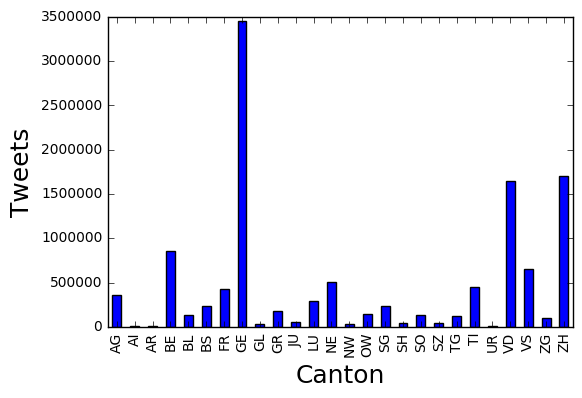

In [23]:
ax=swiss.groupby('canton').size().plot(kind='bar')
plt.xlabel('Canton',fontsize=18)
plt.ylabel('Tweets',fontsize=18)

In [ ]:
#file for each canton

In [ ]:
#languages detection per canton